In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler


In [ ]:
# create signal with frequency shifts
sr = 16000
t = np.linspace(0, 5, 5 * sr)
y = np.sin(2 * np.pi * 220 * t) * (t < 1) + \
    np.sin(2 * np.pi * 440 * t) * ((t >= 1) & (t < 3)) + \
    np.sin(2 * np.pi * 330 * t) * (t >= 3)

In [3]:
# compute spectrogram
f, t_spec, Sxx = signal.spectrogram(y, fs=sr, nperseg=512, noverlap=256)
log_S = 10 * np.log10(Sxx + 1e-10).T  # frames x freqs
scaler = StandardScaler()
log_S_scaled = scaler.fit_transform(log_S)

In [ ]:
# train HMM
model = hmm.GaussianHMM(n_components=5, covariance_type='diag', n_iter=50, random_state=42)
model.fit(log_S_scaled)

# predict
states = model.predict(log_S_scaled)

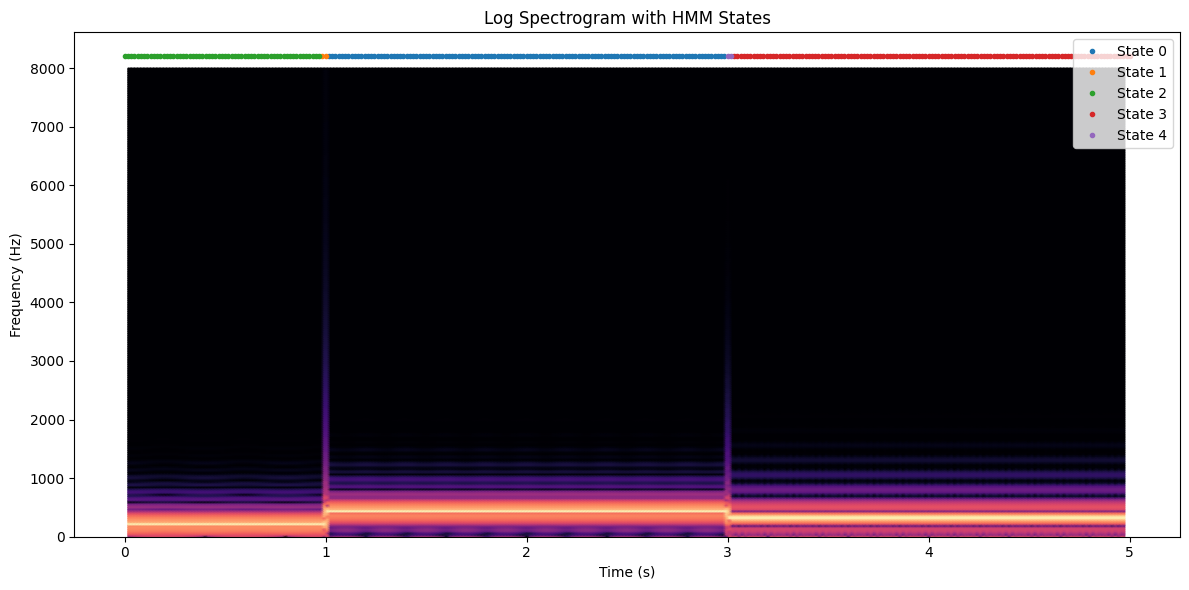

In [5]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(t_spec, f, log_S.T, shading='gouraud', cmap='magma')
plt.title('Log Spectrogram with HMM States')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
frame_times = np.linspace(0, 5, num=len(states))
for state in range(5):
    plt.plot(frame_times[states == state], [f[-1] + 200] * np.sum(states == state), '.', label=f'State {state}')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()